In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

## Expected value of $4x_1+5$

$x_1$ described by a uniform random variable bounded between 0 and 10 

### Analytical derivation:

Integral => $2x_1^2 + 5x_1$ bounded between 0 and 10

In [2]:
exp_g1 = (2*10**2 + 5*10)/10
print('Analytical method: expectation of g_1:', exp_g1)

Analytical method: expectation of g_1: 25.0


### Numerical derivation via Monte Carlo

$E[g_1] = \sum g_1(x_1) / N_{samples}$

In [3]:
samples_1 = 100000
x_1 = np.random.uniform(0, 10, size=(samples_1))
g_1 = 4*x_1+ 5
expected_g_1 = np.sum(g_1)/samples_1
#print(x_1, g_1)
print(expected_g_1)

24.996344573708186


## Monte Carlo: find out the value of $\pi$

Points inside:  6  Total points:  10
pi =  2.4


<IPython.core.display.Javascript object>


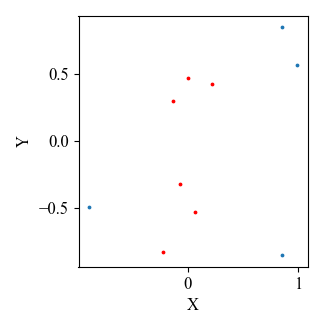

In [8]:
# Generation of samples
samples = 10
x = np.random.uniform(-1, 1, size=(samples))
y = np.random.uniform(-1, 1, size=(samples))

# Check if the points are inside the circle
crit = x**2 + y**2
in_circle = np.sum(crit <= 1)
# out_circle = np.sum(crit > 1)

# Estimate pi
pi_estimation = 4*(in_circle/samples)
# print(x,y)
print('Points inside: ', in_circle, ' Total points: ', samples)
print('pi = ',pi_estimation)

#Plotting
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.scatter(x[crit <= 1], y[crit <= 1], color='red', s=3)
ax.scatter(x[crit > 1], y[crit > 1], s=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.subplots_adjust(left=0.25, right=.98, top=0.95, bottom=0.15, hspace = 0.65, wspace=0.15)
plt.show()

## Bayesian "probability"

## Prior model
Probability of getting heads => described by a Bernoulli distribution with parameter p_coin
p_coin => described by a Beta distribution (a=7, b=4)

0.6363636363636364 0.13886593015017698 0.2182178902359924


<IPython.core.display.Javascript object>


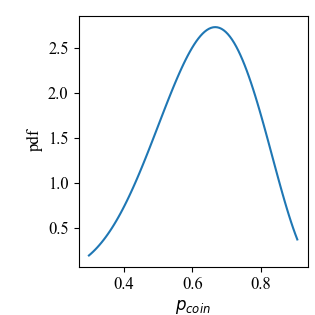

In [5]:
a_prior, b_prior = 7, 4
mean_prior, var_prior = st.beta.stats(a_prior, b_prior, moments='mv')
print(mean_prior, var_prior**0.5, var_prior**0.5/mean_prior)

x_2 = np.linspace(st.beta.ppf(0.01, a_prior, b_prior), st.beta.ppf(0.99, a_prior, b_prior), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_2, st.beta.pdf(x_2, a_prior, b_prior), label='beta pdf')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.95, bottom=0.15, hspace = 0.65, wspace=0.15)
plt.show()

### Fair-sided coin
Updating of hyperparameters a and b and computation of the prediction p_coin

0.5315315315315315 0.0471515189233523 0.08870878983884924


<IPython.core.display.Javascript object>


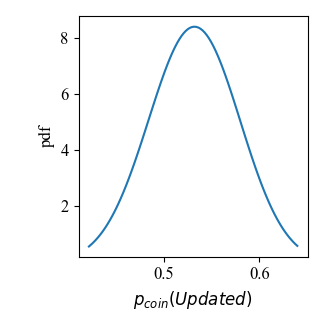

In [6]:
experim_fair = 100
outcomes_fair = np.random.randint(0,2, size=(experim_fair))
#print(outcomes_fair)

heads_fair = np.sum(outcomes_fair>0)
tails_fair = np.sum(outcomes_fair<1)

a_upd_fair, b_upd_fair = 7 + heads_fair, 4 + tails_fair
mean_fair, var_fair = st.beta.stats(a_upd_fair, b_upd_fair, moments='mv')
print(mean_fair, var_fair**0.5, var_fair**0.5/mean_fair)

x_3 = np.linspace(st.beta.ppf(0.01, a_upd_fair, b_upd_fair), st.beta.ppf(0.99, a_upd_fair, b_upd_fair), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_3, st.beta.pdf(x_3, a_upd_fair, b_upd_fair), label='beta pdf')
ax.set_xlabel('$p_{coin}(Updated)$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.95, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

### Biased coin
Updating of hyperparameters a and b and computation of the prediction p_coin

0.2882882882882883 0.04280125906902417 0.14846686739567758


<IPython.core.display.Javascript object>


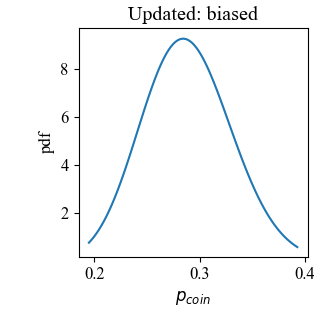

In [7]:
experim_biased = 100
outcomes_biased = np.random.binomial(1, 0.2, size=(experim_biased))
#print(outcomes_biased)

heads_biased = np.sum(outcomes_biased>0)
tails_biased = np.sum(outcomes_biased<1)

a_upd_biased, b_upd_biased = 7 + heads_biased, 4 + tails_biased
mean_biased, var_biased = st.beta.stats(a_upd_biased, b_upd_biased, moments='mv')
print(mean_biased, var_biased**0.5, var_biased**0.5/mean_biased)

x_4 = np.linspace(st.beta.ppf(0.01, a_upd_biased, b_upd_biased), st.beta.ppf(0.99, a_upd_biased, b_upd_biased), 100)
fig, ax = plt.subplots(1, figsize=(8*cm, 8*cm))
ax.plot(x_4, st.beta.pdf(x_4, a_upd_biased, b_upd_biased), label='beta pdf')
ax.set_title('Updated: biased')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()

### Plotting prior and posteriors

<IPython.core.display.Javascript object>


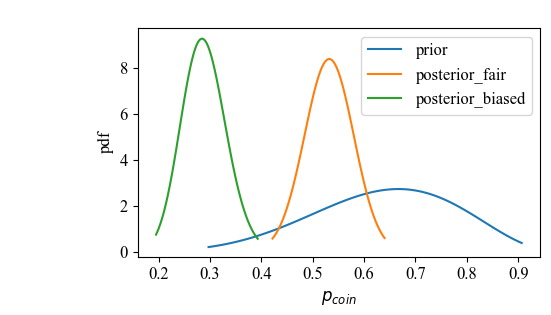

In [15]:
fig, ax = plt.subplots(1, figsize=(14*cm, 8*cm))
ax.plot(x_2, st.beta.pdf(x_2, a_prior, b_prior), label='beta pdf')
ax.plot(x_3, st.beta.pdf(x_3, a_upd_fair, b_upd_fair), label='beta pdf')
ax.plot(x_4, st.beta.pdf(x_4, a_upd_biased, b_upd_biased), label='beta pdf')
ax.set_xlabel('$p_{coin}$')
ax.set_ylabel('pdf')
ax.legend(labels=['prior', 'posterior_fair', 'posterior_biased'], loc=0)
plt.subplots_adjust(left=0.25, right=.98, top=0.91, bottom=0.18, hspace = 0.65, wspace=0.15)
plt.show()